In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel("./data/DawnResults/Pak_Election_Voting_Results_Dawn_API_Combine.xlsx")
print(df)

     province             district     constituency_name        pop  \
0      Punjab               Attock             Attock-II   496142.0   
1      Punjab             Mianwali           Mianwali-II   638480.0   
2      Punjab           Rawalpindi         Rawalpindi-VI   570886.0   
3      Punjab               Lahore              Lahore-I   556480.0   
4      Punjab               Attock              Attock-I   531585.0   
...       ...                  ...                   ...        ...   
1078    Sindh  Tando Muhammad Khan   Tando Muhammad Khan   726119.0   
1079    Sindh           Tharparkar          Tharparkar-I   897087.0   
1080    Sindh           Tharparkar         Tharparkar-II   881320.0   
1081    Sindh               Thatta                Thatta  1083191.0   
1082    Sindh              UmerKot               Umerkot  1159831.0   

      no_of_polling_stations      male    female   total na_name  \
0                        266  165266.0  150821.0  316087   NA-58   
1          

In [90]:
#print(df['Votes'])

df.replace('PTI-Backed', 'PTI', inplace=True)

#Extracts Party afflication data for easy usage
filteredData = df.filter(items = ['obtained_votes','total', 'party_affilation', 'YEAR_ELECTION'])

#Structures Data
filteredData['obtained_votes'] = pd.to_numeric(filteredData['obtained_votes'],errors='coerce')
filteredData = filteredData[filteredData['total'] != 0]
#print(type(filteredData['Votes'][0]))

#Keeps Parties with Substantial Vote Total
filteredData = filteredData[(filteredData['obtained_votes'] / filteredData['total']) > 1/4]

pakiParties = filteredData['party_affilation']



print(filteredData)

      obtained_votes   total party_affilation  YEAR_ELECTION
12             56313  198089             PMLN           2008
13             73007  274547             PMLN           2008
14             78427  285041              PPP           2008
16             83098  329227              IND           2008
17             70634  243966              PPP           2008
...              ...     ...              ...            ...
1078          110892  356444              PPP           2024
1079          129992  308482              PPP           2024
1080          132061  415109              PPP           2024
1081          140773  522386              PPP           2024
1082          175162  589350              PPP           2024

[426 rows x 4 columns]


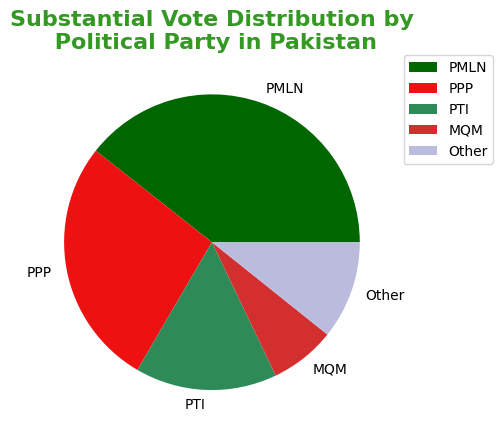

In [91]:
#values, counts = np.unique(pakiParties, return_counts = True)

#Removes Unknown Parties and cleans data
coerce = pakiParties.dropna()
pakiParties = pakiParties.str.strip()


partyOccurences = pakiParties.value_counts()

#Merge PTI and PTI Backed
#partyOccurences['PTI'] = partyOccurences['PTI'] + partyOccurences['PTI-Backed']
#partyOccurences = partyOccurences.drop(labels = ['PTI-Backed'])

colors = [
    "#006600",  # PML-N - Dark Green
    "#EE1111",  # PPP - Red
    "#2E8B57",  # MQM - Light Blue
    "#D32F2F",  # PTI - Bold Red
     "#BBBBDD",  # PML - Fresh Green
    "#228B22",  # PML-F - Forest Green
    "#000000",  # JUIP - Black
    "#2E8B57"   # MQM-P - Sea Green
]
otherPrty = pd.Series([sum(set(partyOccurences[4:]))])
partyOccurences = partyOccurences[:4]
partyOccurences = pd.concat([partyOccurences, otherPrty])

(partyOccurences.keys().array[-1]) = 'Other'

plt.pie(partyOccurences.values, labels=partyOccurences.keys(), colors=colors)
plt.title('Substantial Vote Distribution by\n Political Party in Pakistan', fontsize=16, fontweight='bold', color='#339922')

plt.legend(bbox_to_anchor=(1,1.025), loc="upper left")


plt.savefig('vote_distribution.png', format='png', dpi=300)
plt.show()

In [100]:
#print(filteredData['party_affilation'].value_counts())
politicalParties = filteredData['party_affilation'].value_counts().keys().values
politicalParties = politicalParties[:5]

#print(filteredData)
for party in politicalParties:
    databyYear = filteredData[filteredData['party_affilation'] == party]
    
    plt.plot(databyYear['YEAR_ELECTION'].value_counts(sort=False), label = party)
    plt.legend(loc='best')
    
plt.show()
#print((electionYears.T))
#databyParty = filteredData.groupby('party_affilation')
#databyParty = databyParty['YEAR_ELECTION'].value_counts()

KeyError: 'party_affilation'

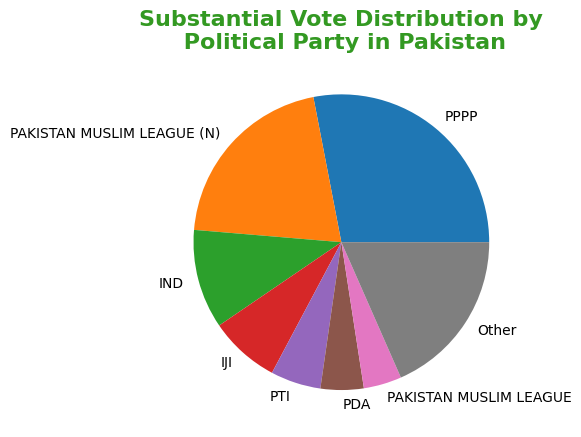

In [101]:
df = pd.read_csv("./data/comprehensiveDataset/Kaggle-v6-ElectionData.csv")

#print(df.columns)

df.replace('PTI-Backed', 'PTI', inplace=True)

#Extracts Party afflication data for easy usage
filteredData = df.filter(items = ['Votes','Total_Valid_Votes', 'Party', 'Election'])

#Structures Data
filteredData['Votes'] = pd.to_numeric(filteredData['Votes'],errors='coerce')
filteredData['Total_Valid_Votes'] = pd.to_numeric(filteredData['Total_Valid_Votes'],errors='coerce')
filteredData['Election'] = pd.to_numeric(filteredData['Election'],errors='coerce')

filteredData = filteredData[filteredData['Total_Valid_Votes'] != 0]
#print(type(filteredData['Votes'][0]))

#Keeps Parties with Substantial Vote Total
filteredData = filteredData[(filteredData['Votes'] / filteredData['Total_Valid_Votes']) > 1/4]
#filteredData = filteredData[filteredData['Election'] > 2000]

pakiParties = filteredData['Party']






partyOccurences = pakiParties.value_counts()


numberOfParties = 7
otherPrty = pd.Series([sum(set(partyOccurences[numberOfParties:]))])
partyOccurences = partyOccurences[:numberOfParties]
partyOccurences = pd.concat([partyOccurences, otherPrty])

(partyOccurences.keys().array[-1]) = 'Other'

plt.pie(partyOccurences.values, labels=partyOccurences.keys())
plt.title('Substantial Vote Distribution by\n Political Party in Pakistan', fontsize=16, fontweight='bold', color='#339922')

#plt.legend()


plt.savefig('vote_distribution.png', format='png', dpi=300)
plt.show()

print()